# **Diabetes Prediction**
- The Diabetes prediction dataset is a collection of medical and demographic data of patients. The dataset includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.
- The dataset is used to build machine learning models to predict diabetes of patients.
- This can be useful for healthcare professionals to identifying patients who are suffering from diabetes and they can get treatment earlier.
- Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

## **Load the Dataset**

In [ ]:
# Read the dataset and store it in db variable.
db = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
# show the data
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## **Data Cleaning**

In [ ]:
# To see the columns in the dataset
db.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# To get the dimension of a dataset.
db.shape

(100000, 9)

In [ ]:
# get the information of a dataset.
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# change the datatype of age column into int
db['age'] = db['age'].astype(int)

In [ ]:
# change the datatype of blood_glucose_level column into float
db['blood_glucose_level'] = db['blood_glucose_level'].astype(float)

In [ ]:
# check the datatype of column

db.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

In [ ]:
# Check the Statistical data using describe() method.
db.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# To check whether the null values are present in the dataset or not, isnull() method is used.
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Count the values of the Diabetes column from the dataset

db['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
# Group the rows in the database by diabetes column and then calculate the mean of each group

db.groupby('diabetes').mean()

<ipython-input-14-e9c0b3f12769>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.104044,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [ ]:
# group the rows in the database by the gender column and then calculate the mean of each group
db.groupby('gender').mean()

<ipython-input-15-64ffce7e90a1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db.groupby('gender').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.454826,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.062491,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


In [ ]:
# here also same for smoking_history column
db.groupby('smoking_history').mean()

<ipython-input-16-e8751dce51bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db.groupby('smoking_history').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,
No Info,33.511838,0.033560,0.025771,25.343505,5.461607,135.244248,0.040596
current,44.063429,0.089597,0.044045,28.432968,5.547997,139.641719,0.102089
ever,49.136863,0.104645,0.078172,28.761761,5.578122,139.307193,0.117882
former,57.061698,0.143178,0.097092,29.620746,5.651861,143.214713,0.170017
never,43.889471,0.091295,0.031258,28.104621,5.543063,138.748654,0.095341
not current,47.688382,0.075849,0.045292,28.205088,5.567597,139.393671,0.107027


In [ ]:
# To Convert categorical values to numerical values, there are different techniques are used like Label Encoding or One hot encoding,etc.

db['gender'].replace(['Female','Male','Other'],[0,1,2],inplace=True)
db['smoking_history'].replace(['No Info','never','former','current','ever','not current'],[0.5,0,0.5,1,0.5,0.5],inplace=True)

In [ ]:
db.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,25.19,6.6,140.0,0
1,0,54,0,0,27.32,6.6,80.0,0
2,1,28,0,0,27.32,5.7,158.0,0
3,0,36,0,0,23.45,5.0,155.0,0
4,1,76,1,1,20.14,4.8,155.0,0


## **Data Visualization**

 **Correlation between all the features**

<Axes: >

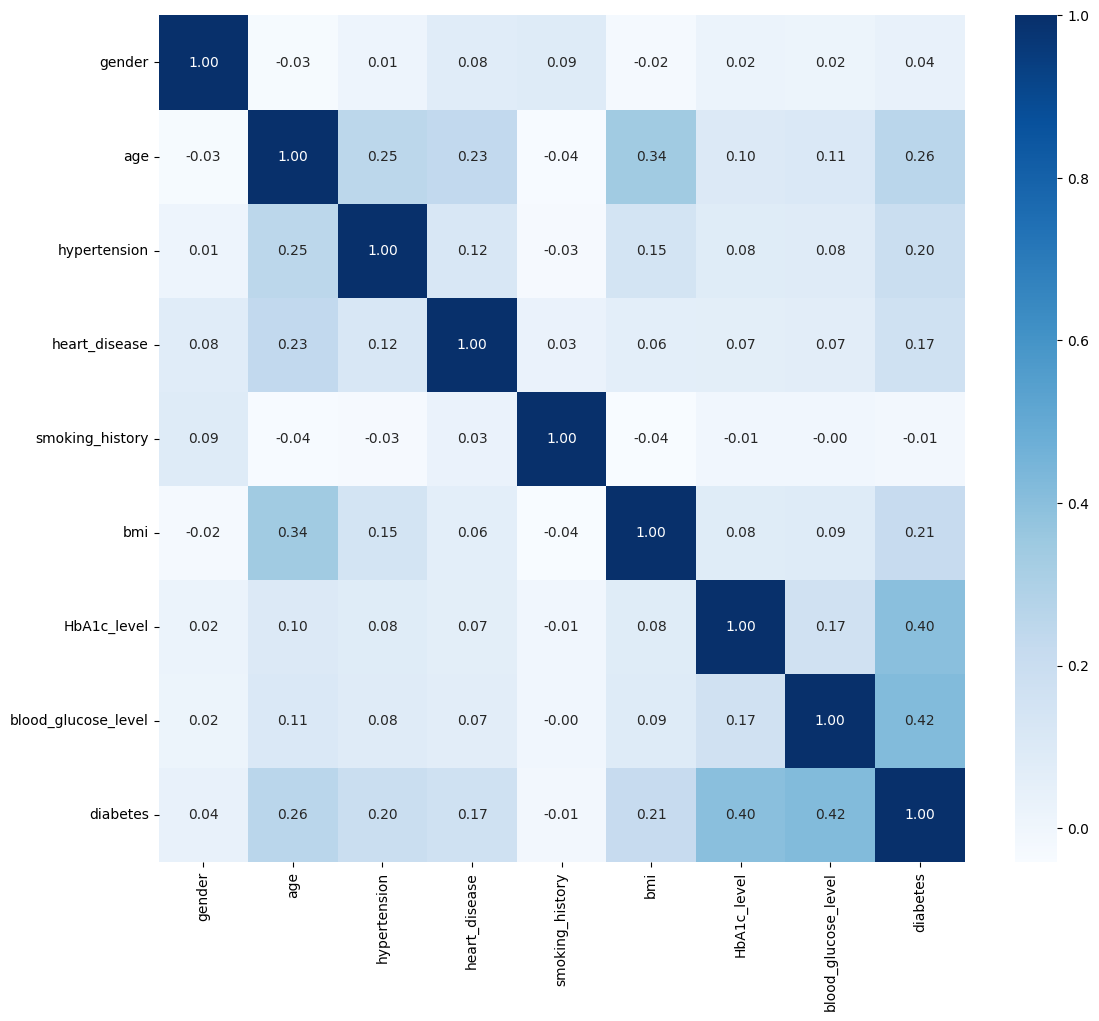

In [ ]:
# use Heatmap to view the correlation between the features

plt.figure(figsize=(13,11))
sns.heatmap(db.corr(),annot=True, fmt = ".2f",cmap="Blues")  # use cmap="coolwarm","Blues" and many other

In [ ]:
# count the value of gender
db['gender'].value_counts()

0    58552
1    41430
2       18
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

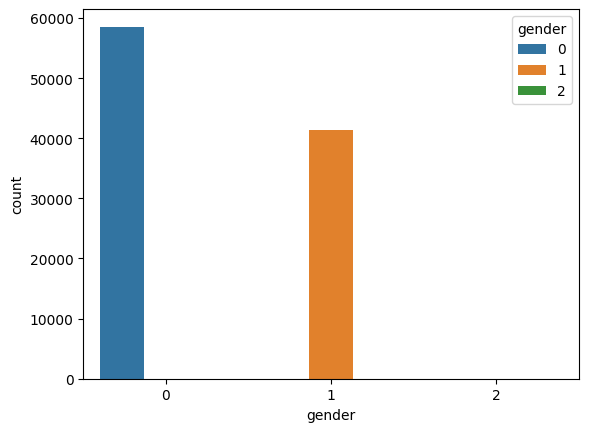

In [ ]:
# use countplot for display the data of gender using seaborn library

sns.countplot(x ='gender', data = db, hue="gender")

<Axes: xlabel='heart_disease', ylabel='count'>

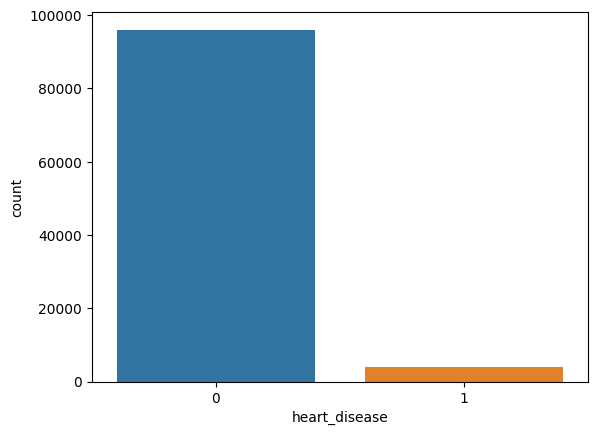

In [ ]:
sns.countplot(x ='heart_disease', data = db)

<Axes: xlabel='hypertension', ylabel='count'>

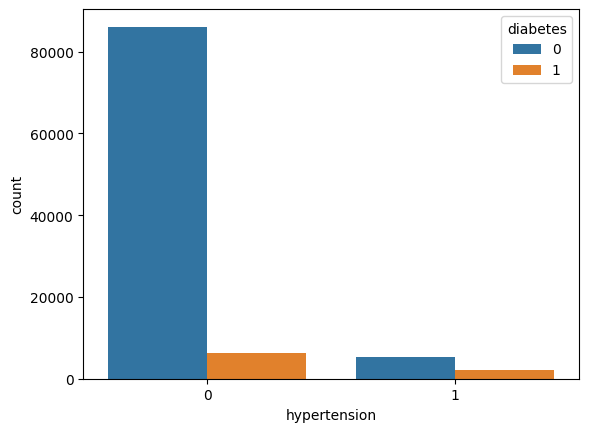

In [ ]:
# use countplot for display the data of hypertension with respect to diabetes

sns.countplot(x ='hypertension', data = db, hue="diabetes")

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

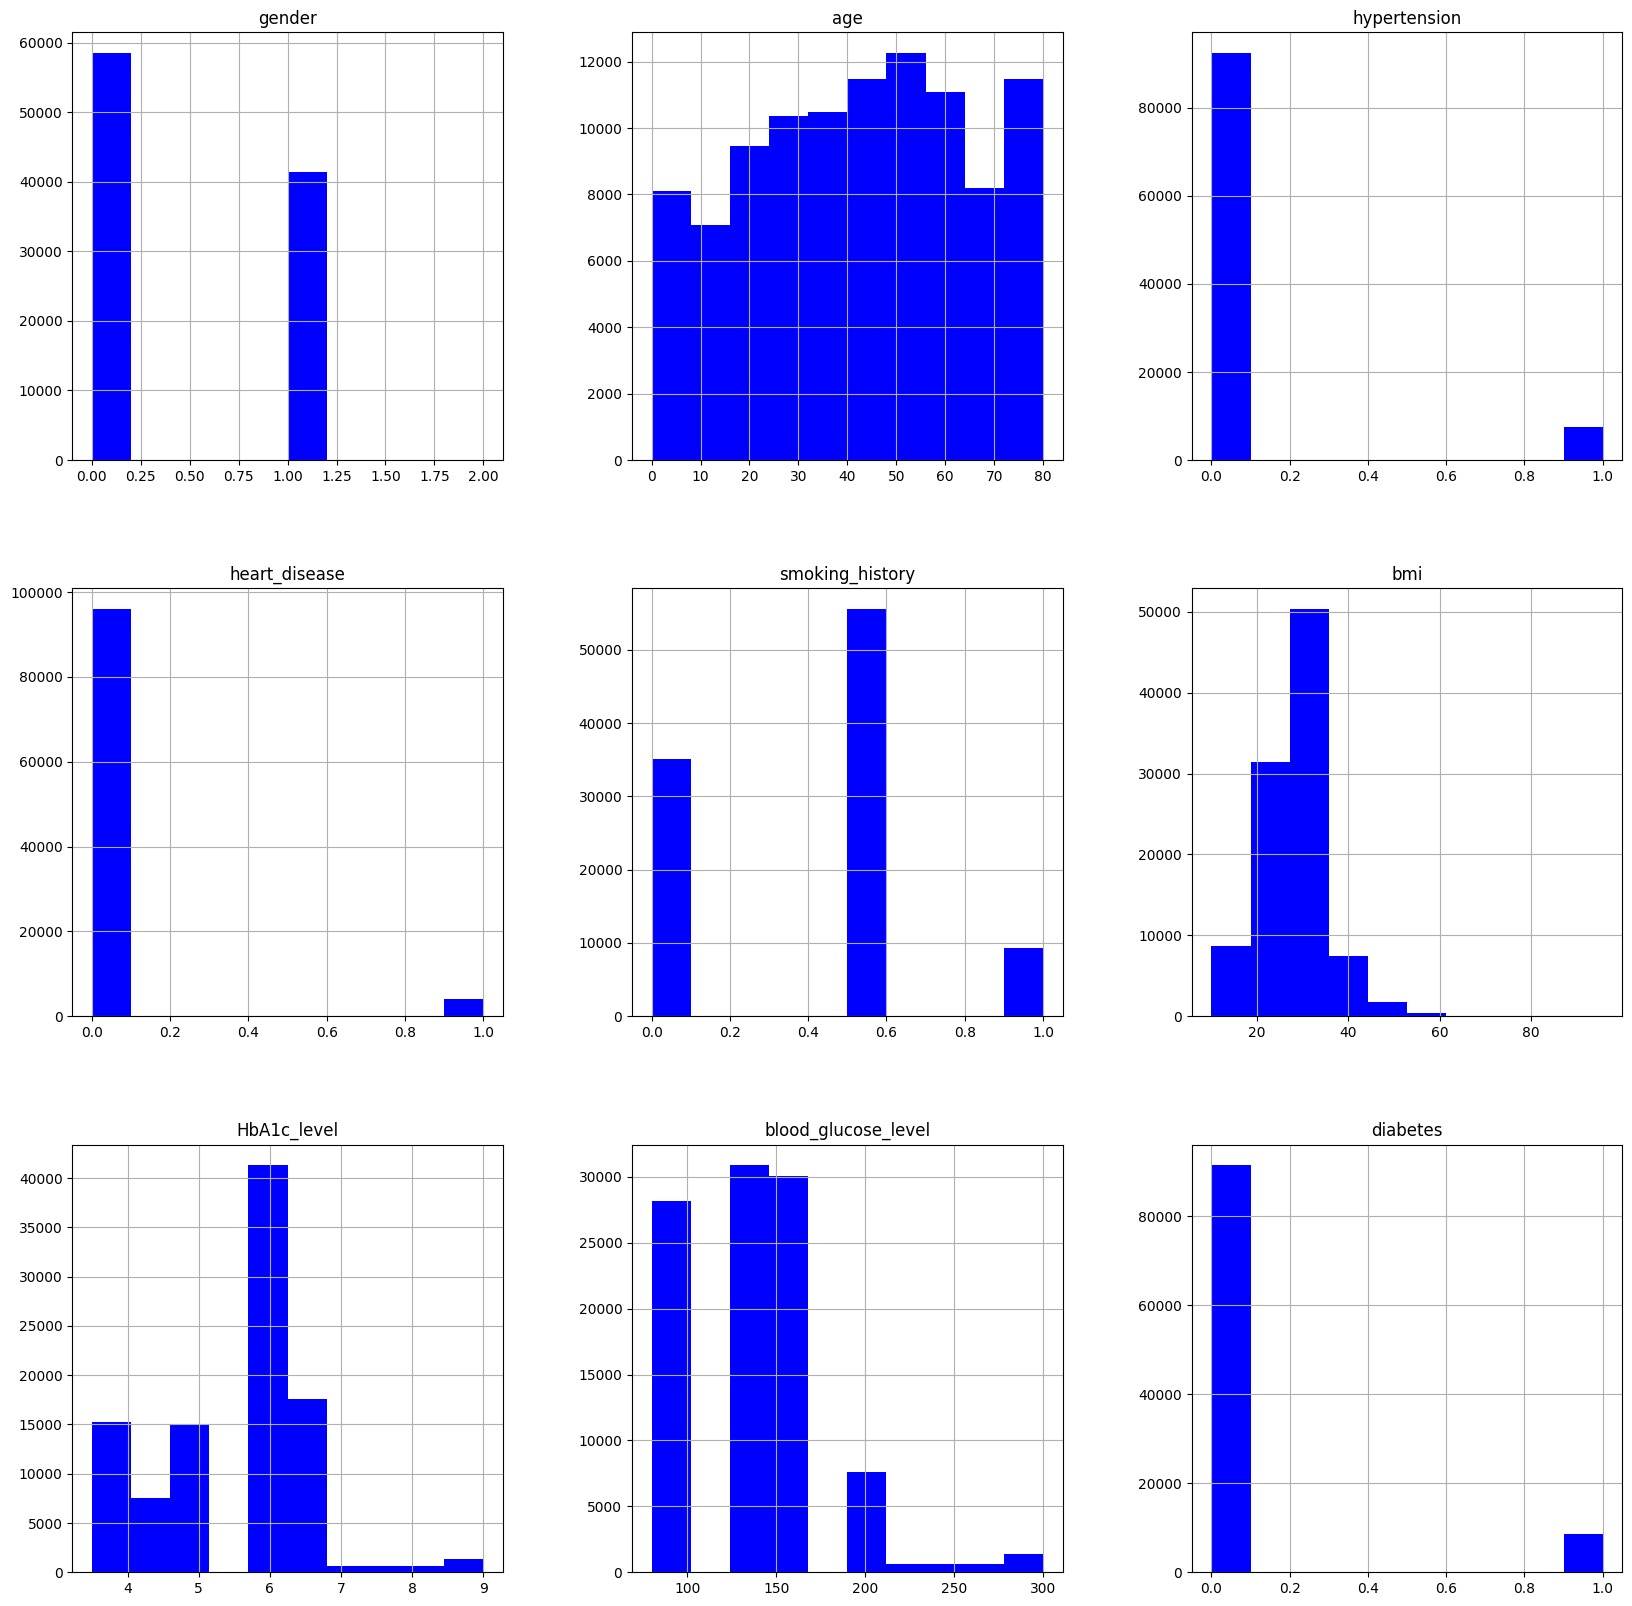

In [ ]:
# to plot a histogram of dataset columns for analyse the data.
# figsize is a size of the figure, and grid argument controls whether or not to show a grid.

db.hist(figsize=(20,20),color='Blue', grid=True)


In [ ]:
# smoking_history column is not correlated with the diabetes. so drop the smoking_history columns from dataset.
db = db.drop("smoking_history",axis=1)

In [ ]:
# Check the data for smoking_history is removed or not
db.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,25.19,6.6,140.0,0
1,0,54,0,0,27.32,6.6,80.0,0
2,1,28,0,0,27.32,5.7,158.0,0
3,0,36,0,0,23.45,5.0,155.0,0
4,1,76,1,1,20.14,4.8,155.0,0


In [ ]:
# check number of columns
db.shape

(100000, 8)

In [ ]:
# select the dependent and independent columns and put it in 2 variables x and y.
# y --> Dependent variable
# x --> Independent Variable

y = db['diabetes']
x = db.drop('diabetes',axis=1)

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,25.19,6.6,140.0
1,0,54,0,0,27.32,6.6,80.0
2,1,28,0,0,27.32,5.7,158.0
3,0,36,0,0,23.45,5.0,155.0
4,1,76,1,1,20.14,4.8,155.0


In [ ]:
db.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,25.19,6.6,140.0,0
1,0,54,0,0,27.32,6.6,80.0,0
2,1,28,0,0,27.32,5.7,158.0,0
3,0,36,0,0,23.45,5.0,155.0,0
4,1,76,1,1,20.14,4.8,155.0,0
5,0,20,0,0,27.32,6.6,85.0,0
6,0,44,0,0,19.31,6.5,200.0,1
7,0,79,0,0,23.86,5.7,85.0,0
8,1,42,0,0,33.64,4.8,145.0,0
9,0,32,0,0,27.32,5.0,100.0,0


## **Data Standardization**

In [ ]:
# StandardScaler is used to standardize a dataset. means the data is rescaled so the std is 1.
scaler = StandardScaler()

In [ ]:
# To do Standardization, the StandardScaler has a method called fit_transform 
# which is used to improve the quality of data.

scaler_data = scaler.fit_transform(x)

In [ ]:
scaler_data

array([[-8.41046744e-01,  1.69176064e+00, -2.84439447e-01, ...,
        -3.21055792e-01,  1.00170572e+00,  4.77042159e-02],
       [-8.41046744e-01,  5.38015377e-01, -2.84439447e-01, ...,
        -1.15583678e-04,  1.00170572e+00, -1.42620999e+00],
       [ 1.18723364e+00, -6.15729883e-01, -2.84439447e-01, ...,
        -1.15583678e-04,  1.61108022e-01,  4.89878478e-01],
       ...,
       [ 1.18723364e+00,  1.07051319e+00, -2.84439447e-01, ...,
         7.67292549e-02,  1.61108022e-01,  4.16182767e-01],
       [-8.41046744e-01, -7.93229154e-01, -2.84439447e-01, ...,
         1.22036126e+00, -1.42668764e+00, -9.34905254e-01],
       [-8.41046744e-01,  6.71139830e-01, -2.84439447e-01, ...,
        -7.36921977e-01,  1.00170572e+00, -1.18055762e+00]])

In [ ]:
# View scaler_data in Dataframe form 

scaler_data = pd.DataFrame(scaler.fit_transform(x),columns=['gender','age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level'])
scaler_data.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.691761,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,-0.841047,0.538015,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,1.187234,-0.615730,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.841047,-0.260731,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.187234,1.514261,3.515687,4.936379,-1.081970,-0.679490,0.416183
5,-0.841047,-0.970728,-0.284439,-0.202578,-0.000116,1.001706,-1.303384
6,-0.841047,0.094267,-0.284439,-0.202578,-1.207032,0.908306,1.521618
7,-0.841047,1.647386,-0.284439,-0.202578,-0.521455,0.161108,-1.303384
8,1.187234,0.005518,-0.284439,-0.202578,0.952158,-0.679490,0.170530
9,-0.841047,-0.438231,-0.284439,-0.202578,-0.000116,-0.492690,-0.934905


In [ ]:
# The STD (Standard Deviation) of scaler_data is 1

scaler_data.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.104894e-17,-1.566391e-16,5.098144e-17,3.367973e-17,-1.729816e-16,-3.410605e-18,-2.786749e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-8.410467e-01,-1.858225e+00,-2.844394e-01,-2.025777e-01,-2.608320e+00,-1.893686e+00,-1.426210e+00
25%,-8.410467e-01,-7.932292e-01,-2.844394e-01,-2.025777e-01,-5.561106e-01,-6.794897e-01,-9.349053e-01
50%,-8.410467e-01,4.989238e-02,-2.844394e-01,-2.025777e-01,-1.155837e-04,2.545078e-01,4.770422e-02
75%,1.187234e+00,8.042643e-01,-2.844394e-01,-2.025777e-01,3.404125e-01,6.281067e-01,5.144437e-01
max,3.215514e+00,1.691761e+00,3.515687e+00,4.936379e+00,1.030161e+01,3.243300e+00,3.978142e+00


## **Model Building**

In [ ]:
# Spliting the Dataset into x and y
# we use the scaler data as x for better prediciton.

x = scaler_data
y = db['diabetes']

In [ ]:
# Now we will split the data into training and testing using the train_test_split() function.

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [ ]:
# print the training and testing data.
print("Training Data: \n",X_train,y_train)
print("\n\n\nTesting Data: \n",X_test,y_test)

Training Data: 
          gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
40051 -0.841047 -0.926354     -0.284439      -0.202578  0.971746    -0.959689   
99400 -0.841047 -0.083232     -0.284439      -0.202578 -1.084984    -0.492690   
38475  1.187234  1.514261     -0.284439      -0.202578 -0.000116     1.842303   
82212 -0.841047 -0.393856     -0.284439      -0.202578  2.763285    -1.893686   
59706 -0.841047  0.937389      3.515687      -0.202578  1.753755     0.908306   
...         ...       ...           ...            ...       ...          ...   
9372   1.187234  1.292387      3.515687      -0.202578  0.364521     3.056500   
93553  1.187234  0.183017     -0.284439      -0.202578 -0.000116    -0.959689   
50496 -0.841047  0.138642     -0.284439      -0.202578 -0.000116    -0.679490   
94735 -0.841047  1.203638     -0.284439      -0.202578 -0.934308     1.001706   
83209  1.187234  0.493641     -0.284439      -0.202578 -0.000116     0.628107   

       blo

In [ ]:
# to check how much data split into training and testing

print(x.shape,X_train.shape,X_test.shape)

(100000, 7) (90000, 7) (10000, 7)


## **Decision Tree Classifier**

In [ ]:
# Use the Decision tree classifier for diabetes prediction 
# Fit the model using training data, predict the data using X_test and find the accuracy of model

decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

y_pred = decision.predict(X_test)

In [ ]:
# This will print all the scores of Decision Tree model including accuracy, precision_score, recall, f1_score and confusion matrix

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9517
0.6978922716627635
0.7259439707673568
0.711641791044776
[[8921  258]
 [ 225  596]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9179
           1       0.70      0.73      0.71       821

    accuracy                           0.95     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
# also check the MSE (Mean Squared Error)

MSE_score = MSE(y_test,y_pred)
print("Mean Squared Error: ",MSE_score)

Mean Squared Error:  0.0483


## **Logistic Regression**

In [ ]:
# use the Logistic Regression Model and fit the training data into it.

logistic = LogisticRegression()
logistic.fit(X_train,y_train)

l_pred = logistic.predict(X_test)
print("Accuracy Score = ",accuracy_score(l_pred,y_test))

Accuracy Score =  0.9598


In [ ]:
print("Accuracy Score = ",accuracy_score(y_test,l_pred))
print("Precision_Score = ",precision_score(y_test,l_pred))
print("recall_score = ",recall_score(y_test,l_pred))
print("f1_score = ",f1_score(y_test,l_pred))
print("confusion_matrix = \n",confusion_matrix(y_test,l_pred))
print("\n\nclassification_report: \n",classification_report(y_test,l_pred))

Accuracy Score =  0.9598
Precision_Score =  0.8643478260869565
recall_score =  0.6053593179049939
f1_score =  0.7120343839541546
confusion_matrix = 
 [[9101   78]
 [ 324  497]]


classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9179
           1       0.86      0.61      0.71       821

    accuracy                           0.96     10000
   macro avg       0.91      0.80      0.85     10000
weighted avg       0.96      0.96      0.96     10000



## **Support Vector Machine**

In [ ]:
# use the Support Vector Machine and fit the training data into it.
model = svm.SVC()
model.fit(X_train,y_train)

# Evaluate model using predict() method
predict = model.predict(X_test)

# To check the accuracy of this model we use accuracy_score() method
accuracy = accuracy_score(predict,y_test)
print("Accuracy score of test data: ",accuracy)

Accuracy score of test data:  0.9649


In [ ]:
# This will print all the scores of SVM model including accuracy, precision_score, recall, f1_score and confusion matrix

print("accuracy_score: ",accuracy_score(y_test,predict))
print("precision_score: ",precision_score(y_test,predict))
print("recall_score: ",recall_score(y_test,predict))
print("f1_score: ",f1_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("\n\nclassification_report: \n",classification_report(y_test,predict))

accuracy_score:  0.9649
precision_score:  0.9835390946502057
recall_score:  0.582216808769793
f1_score:  0.7314460596786535
confusion_matrix: 
 [[9171    8]
 [ 343  478]]


classification_report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      9179
           1       0.98      0.58      0.73       821

    accuracy                           0.96     10000
   macro avg       0.97      0.79      0.86     10000
weighted avg       0.97      0.96      0.96     10000



In [ ]:
# Mean Squared Error is used to compare the accuracy of different estimators.
# It calculate from the average squared difference between the estimated values and the actual value.

MSE_score = MSE(y_test,predict)
print("Mean Squared Error: ",MSE_score)

Mean Squared Error:  0.0351


## **Random Forest**

In [ ]:
# Use RandomForest Classifier for better Prediction, for that i use hyperparameter like n_estimators, max_leaf_nodes, etc.
# Fit the model using training data, predict the data using X_test and find the accuracy of model.

random = RandomForestClassifier(n_estimators=100, random_state=10, max_leaf_nodes = 15)
# random = RandomForestClassifier(n_estimators=500, max_leaf_nodes = 15, n_jobs = -1)

random.fit(X_train, y_train)
random_preds = random.predict(X_test)

print("Accuracy of RandomForest on validation data : ", accuracy_score(y_test, random_preds))


Accuracy of RandomForest on validation data :  0.9716


### In RandomForest Classifier the accuracy is very good for predicting Diabetes of a patients.

In [ ]:
# This will print all the scores of RandomForest model including accuracy, precision_score, recall, f1_score and confusion matrix

print("accuracy_score: ",accuracy_score(y_test,random_preds))
print("precision_score: ",precision_score(y_test,random_preds))
print("recall_score: ",recall_score(y_test,random_preds))
print("f1_score: ",f1_score(y_test,random_preds))
print("confusion_matrix: \n",confusion_matrix(y_test,random_preds))
print("\n\nclassification_report: \n",classification_report(y_test,random_preds))

accuracy_score:  0.9716
precision_score:  1.0
recall_score:  0.6540803897685749
f1_score:  0.7908689248895434
confusion_matrix: 
 [[9179    0]
 [ 284  537]]


classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9179
           1       1.00      0.65      0.79       821

    accuracy                           0.97     10000
   macro avg       0.98      0.83      0.89     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# also check the MSE (Mean Squared Error)

MSE_score = MSE(y_test,random_preds)
print("Mean Squared Error: ",MSE_score)

Mean Squared Error:  0.0284
